In [1]:
library("readxl")
library("SNPassoc")
# xls files
my_data <- read_excel("../data/data_Ali.xlsx")

Registered S3 method overwritten by 'SNPassoc':
  method            from       
  summary.haplo.glm haplo.stats



In [2]:
data(my_data, package = "SNPassoc")
str(my_data, list.len=9)

Warning message in data(my_data, package = "SNPassoc"):
“data set ‘my_data’ not found”


tibble [80 × 603] (S3: tbl_df/tbl/data.frame)
 $ ID          : num [1:80] 11 14 17 19 22 23 39 40 41 42 ...
 $ Status      : num [1:80] 1 0 0 1 0 1 1 1 1 0 ...
 $ Gender      : chr [1:80] "F" "F" "M" "M" ...
 $ Age         : num [1:80] 62 56 43 62 57 50 59 57 63 44 ...
 $ BMI         : num [1:80] 29.3 37.2 31.5 20.1 30.8 ...
 $ Kidey       : num [1:80] 0 0 0 0 0 0 0 0 1 0 ...
 $ HbA1c       : chr [1:80] "11.1" "9.1" "8.3000000000000007" "10.4" ...
 $ rs225131    : chr [1:80] "TT" "TC" "TT" "TC" ...
 $ rs225132    : chr [1:80] "TT" "TG" "TT" "TG" ...
  [list output truncated]


In [3]:
idx <- grep("^rs", colnames(my_data))
my_data.s <- setupSNP(data=my_data, colSNPs=idx, sep="")

In [4]:
d <- summary(my_data.s, print=FALSE)

             alleles major.allele.freq HWE      missing (%)
rs225131     T/C      70.0             0.604778 0          
rs225132     T/G      70.0             0.604778 0          
rs17367504   A/G      80.6             1.000000 0          
rs2024758    G/A      52.5             0.658966 0          
rs848309     C/T      55.0             0.656783 0          
rs10903129   A/G      58.8             0.164366 0          
rs12027110   A/T      58.8             0.643767 0          
rs12027135   A/T      58.8             0.354614 0          
rs4360494    G/C      50.6             0.268682 0          
rs4660293    A/G      77.5             0.526798 0          
rs11577368   C/A      76.9             1.000000 0          
rs2253467    C/G      65.0             1.000000 0          
rs2253466    T/C      65.0             1.000000 0          
rs2495497    C/T      71.2             0.271689 0          
rs11206510   T/C      93.1             1.000000 0          
rs2479409    A/G      57.5             0

In [5]:
write.csv(d, "../data/R_stat.csv", row.names=TRUE)

Warning message in `[.data.frame`(x, colSNPs, drop = FALSE):
“'drop' argument will be ignored”


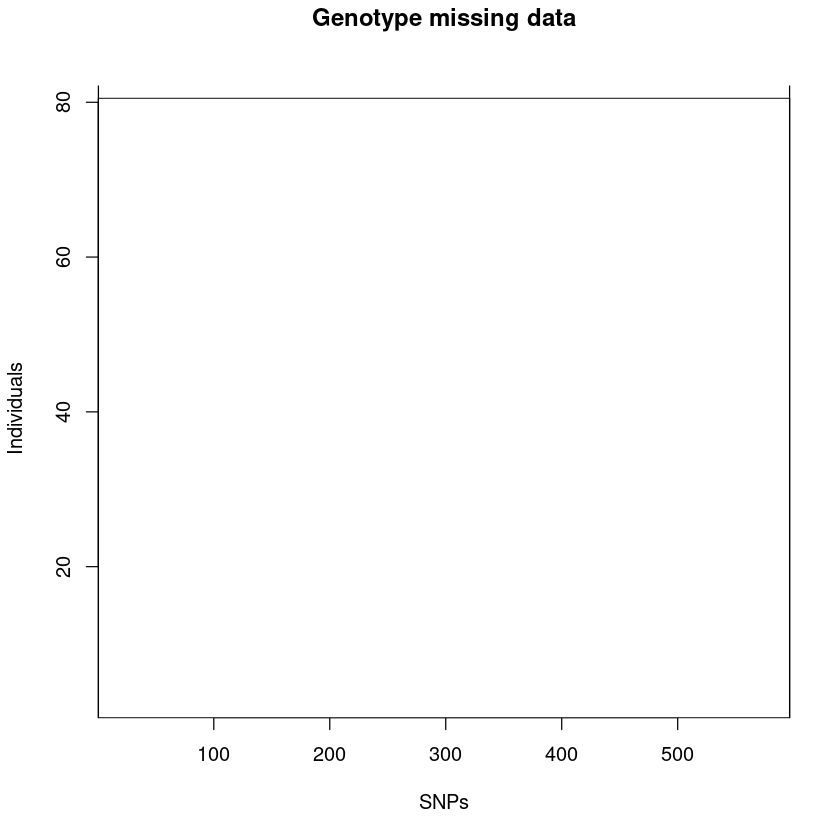

In [6]:
plotMissing(my_data.s, print.labels.SNPs = FALSE)

In [7]:
hwe <- tableHWE(my_data.s)
hwe

,HWE (p value)
rs225131,0.6047776
rs225132,0.6047776
rs17367504,1.0000000
rs2024758,0.6589660
rs848309,0.6567830
rs10903129,0.1643665
rs12027110,0.6437673
rs12027135,0.3546139
rs4360494,0.2686820
rs4660293,0.5267985


In [8]:
hwe2 <- tableHWE(my_data.s, Status)
hwe2

,all groups,0,1
rs225131,0.6047776,1.00000000,0.72603490
rs225132,0.6047776,1.00000000,0.72603490
rs17367504,1.0000000,1.00000000,1.00000000
rs2024758,0.6589660,0.29664850,0.15567282
rs848309,0.6567830,0.29664850,0.77764039
rs10903129,0.1643665,0.47560426,0.23921358
rs12027110,0.6437673,0.71396596,0.77277264
rs12027135,0.3546139,0.29664850,0.76586128
rs4360494,0.2686820,0.49282356,0.39634552
rs4660293,0.5267985,1.00000000,0.47275695


In [9]:
snpNHWE <- hwe2[,1]>0.05 & hwe2[,2]<0.05
rownames(hwe2)[snpNHWE]
hwe2[snpNHWE,]

snps.ok <- rownames(hwe2)[hwe2[,2]>=0.001]

[1] NA           NA           NA           NA           NA          
  [6] NA           NA           NA           NA           NA          
 [11] NA           NA           "rs231362"   NA           NA          
 [16] NA           NA           NA           NA           NA          
 [21] NA           NA           NA           NA           NA          
 [26] NA           NA           NA           NA           NA          
 [31] NA           NA           NA           NA           NA          
 [36] NA           NA           NA           NA           NA          
 [41] NA           NA           NA           NA           NA          
 [46] NA           NA           NA           NA           NA          
 [51] NA           "rs776746"   NA           NA           NA          
 [56] NA           "rs1870634"  NA           NA           NA          
 [61] NA           "rs1169288"  "rs2244608"  NA           NA          
 [66] NA           NA           NA           NA           NA          
 [71] NA           "rs1884613"  "rs2144908"  "rs4812829"  NA          
 [76] NA           NA           NA           NA           NA          
 [81] NA           NA           NA           NA           NA          
 [86] NA           NA           NA           NA           NA          
 [91] NA           NA           NA           "rs7164479"  NA          
 [96] NA           NA           NA           NA           NA          
[101] NA           NA           NA           NA           "rs16942887"
[106] NA           NA           "rs1122608"  NA           NA          
[111] NA           NA           NA           NA

,all groups,0,1
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA


In [10]:

pos <- which(colnames(my_data)%in%snps.ok, useNames = FALSE)
my_data.s <- setupSNP(my_data, pos, sep="")
association(Status ~ rs225131, data = my_data.s)


SNP: rs225131  adjusted by: 
              0    %  1    %   OR lower upper p-value   AIC
Codominant                                                 
T/T          15 46.9 23 47.9 1.00              0.8746 113.4
T/C          14 43.8 22 45.8 1.02  0.40  2.61              
C/C           3  9.4  3  6.2 0.65  0.12  3.67              
Dominant                                                   
T/T          15 46.9 23 47.9 1.00              0.9272 111.7
T/C-C/C      17 53.1 25 52.1 0.96  0.39  2.35              
Recessive                                                  
T/T-T/C      29 90.6 45 93.8 1.00              0.6065 111.4
C/C           3  9.4  3  6.2 0.64  0.12  3.41              
Overdominant                                               
T/T-C/C      18 56.2 26 54.2 1.00              0.8544 111.6
T/C          14 43.8 22 45.8 1.09  0.44  2.68              
log-Additive                                               
0,1,2        32 40.0 48 60.0 0.90  0.44  1.84  0.7702 111.6

In [11]:
ans <- WGassociation(Status, data=my_data.s)
head(ans)

,comments,codominant,dominant,recessive,overdominant,log-additive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs225131,NA,0.87463293,0.9271678,0.60653675,0.85436392,0.7702369
rs225132,NA,0.87463293,0.9271678,0.60653675,0.85436392,0.7702369
rs17367504,NA,0.97044520,0.9237269,0.80814428,0.99999990,0.8700632
rs2024758,NA,0.09745279,0.9196115,0.04627965,0.08172419,0.2815977
rs848309,NA,0.43768919,0.9196115,0.23250932,0.31371742,0.5463264
rs10903129,NA,0.97912889,0.8422957,1.00000000,0.85354823,0.8843986


Warning message:
“Use of `dat$SNP` is discouraged.
ℹ Use `SNP` instead.”
Warning message:
“Use of `dat$p.value` is discouraged.
ℹ Use `p.value` instead.”


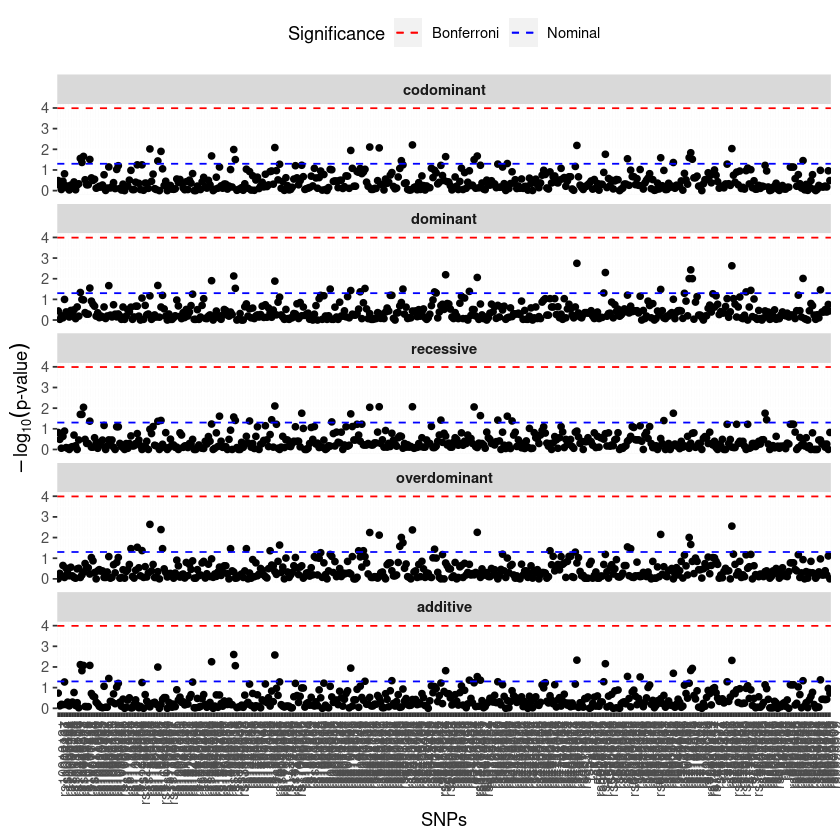

In [12]:
plot(ans)

In [13]:
ans

,comments,codominant,dominant,recessive,overdominant,log-additive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs225131,NA,0.87463293,0.92716784,0.60653675,0.85436392,0.77023688
rs225132,NA,0.87463293,0.92716784,0.60653675,0.85436392,0.77023688
rs17367504,NA,0.97044520,0.92372693,0.80814428,0.99999990,0.87006319
rs2024758,NA,0.09745279,0.91961146,0.04627965,0.08172419,0.28159768
rs848309,NA,0.43768919,0.91961146,0.23250932,0.31371742,0.54632641
rs10903129,NA,0.97912889,0.84229574,1.00000000,0.85354823,0.88439863
rs12027110,NA,0.86566882,0.77035315,0.60583297,0.92716784,0.63127481
rs12027135,NA,0.81296167,0.62123305,0.78998445,0.52009494,0.83257037
rs4360494,NA,0.76548922,0.54303596,0.54120959,0.99999990,0.46472931


In [14]:
write.csv(ans, "../data/R_stat_p.csv", row.names=TRUE)

In [15]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SNPassoc_2.1-0 readxl_1.4.2  

loaded via a namespace (and not attached):
 [1] httr_1.4.5         arsenal_3.6.3      tidyr_1.3.0        jsonlite_1.8.4    
 [5] viridisLite_0.4.1  splines_4.1.2      Formula_1.2-5      cellranger_1.1.0  
 [9] pillar_1.9.0       ba